# Word Cloud

### Bibliotecas

In [ ]:
# Basic Imports
import tweepy
import tweepy as tw
import pandas as pd     
import numpy as np 
import time
import os
import re

# Visualização
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
%matplotlib inline


#------ Pre-Processamento -- -- --
from unicodedata import normalize
import nltk
!pip install twython
from twython import Twython
nltk.download('stopwords')


# Tokeniza
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

import argparse
from urllib.parse import urlparse
import urllib
import csv




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### 1.1) Chaves de Autenticação do Twitter 

In [ ]:
#Keys for autentication
consumer_key=''
consumer_secret=''

access_token=''
access_token_secret=''

### 1.2) Autenticação do Twitter

In [ ]:
#Autentication Methods
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

### 2) Pesquisando Tweets

In [ ]:
#Searchin Twitter Timelines
tweets = []
info = []

i=1

for tweet in tweepy.Cursor(api.search,
                           q="'#COPACATAR2022' OR 'COPADOMUNDO2022' OR 'copadomundo2022' OR 'COPA DO MUNDO' OR 'CATAR2022' OR 'copadomundocatar2022'",
                           tweet_mode='extended',
                           rpp=100,
                           include_entities=True,
                           lang="pt",
                           since='2022-09-01').items(50000):   # 2022-09-01 = 01/09/2022
    if 'retweeted_status' in dir(tweet):
        aux=tweet.retweeted_status.full_text
    else:
        aux=tweet.full_text
        
    newtweet = aux.replace("\n", " ")
   
    tweets.append(newtweet)
    info.append(tweet)
    
    file = open("COPA.txt", "a", -1, "utf-8")
    file.write(newtweet+'\n')
    file.close()
    print('tweet: ', i)
    i=i+1
    

    time.sleep(0.5)


A saída de streaming foi truncada nas últimas 5000 linhas.
tweet:  16719
tweet:  16720
tweet:  16721
tweet:  16722
tweet:  16723
tweet:  16724
tweet:  16725
tweet:  16726
tweet:  16727
tweet:  16728
tweet:  16729
tweet:  16730
tweet:  16731
tweet:  16732
tweet:  16733
tweet:  16734
tweet:  16735
tweet:  16736
tweet:  16737
tweet:  16738
tweet:  16739
tweet:  16740
tweet:  16741
tweet:  16742
tweet:  16743
tweet:  16744
tweet:  16745
tweet:  16746
tweet:  16747
tweet:  16748
tweet:  16749
tweet:  16750
tweet:  16751
tweet:  16752
tweet:  16753
tweet:  16754
tweet:  16755
tweet:  16756
tweet:  16757
tweet:  16758
tweet:  16759
tweet:  16760
tweet:  16761
tweet:  16762
tweet:  16763
tweet:  16764
tweet:  16765
tweet:  16766
tweet:  16767
tweet:  16768
tweet:  16769
tweet:  16770
tweet:  16771
tweet:  16772
tweet:  16773
tweet:  16774
tweet:  16775
tweet:  16776
tweet:  16777
tweet:  16778
tweet:  16779
tweet:  16780
tweet:  16781
tweet:  16782
tweet:  16783
tweet:  16784
tweet:  16785
twe

TweepError: ignored

### 3) Criação do dataframe 

In [ ]:
#Construction of the dataframe
tweets_df = pd.DataFrame(tweets, columns=['Tweets']) 

tweets_df['len']  = np.array([len(tweet) for tweet in tweets])
tweets_df['ID']   = np.array([tweet.id for tweet in info])
tweets_df['Date'] = np.array([tweet.created_at for tweet in info])
tweets_df['Source'] = np.array([tweet.source for tweet in info])
tweets_df['Likes']  = np.array([tweet.favorite_count for tweet in info])
tweets_df['RTs']    = np.array([tweet.retweet_count for tweet in info])
tweets_df['User Location']    = np.array([tweet.user.location for tweet in info])
tweets_df['Geo']    = np.array([tweet.geo for tweet in info])
tweets_df['Coordinates']    = np.array([tweet.coordinates for tweet in info])

tweets_df.to_csv("COPA.csv")

In [ ]:
tweets_df.head(997)



,Tweets,len,ID,Date,Source,Likes,RTs,User Location,Geo,Coordinates
0,Faltam 68 dias para a Copa do Mundo! https://t...,60,1569630251499638784,2022-09-13 10:13:08,Twitter for Android,0,65,Brasília,None,None
1,"Lutador de MMA, José Aldo é Bolsonaro 22! Per...",232,1569630088714412032,2022-09-13 10:12:30,Twitter for Android,0,576,"São Paulo, Brasil",None,None
2,Por mim a seleção brasileira é eliminado na 1°...,160,1569630009890902016,2022-09-13 10:12:11,Twitter for Android,0,0,,None,None
3,copa do mundo em casal kkk https://t.co/sYgUCD...,50,1569629939967598594,2022-09-13 10:11:54,Twitter for Android,0,3600,"Massachusetts, USA",None,None
4,"Lutador de MMA, José Aldo é Bolsonaro 22! Per...",232,1569629892744036354,2022-09-13 10:11:43,Twitter for iPhone,0,576,,None,None
...,...,...,...,...,...,...,...,...,...,...
992,"Lutador de MMA, José Aldo é Bolsonaro 22! Per...",232,1569502480282669056,2022-09-13 01:45:25,Twitter for Android,0,579,,None,None
993,"""Estabilidade e um Bom Salário"" deveria estar ...",280,1569502453342834688,2022-09-13 01:45:19,Twitter for Android,0,6,Rita's shit,None,None
994,É saudade que não acaba mais! 😭 Com a Copa do...,198,1569502440809963522,2022-09-13 01:45:16,Twitter for Android,0,27,fan account ♡ she/her,None,None
995,"que temporada incrível de cobra kai, e na próx...",154,1569502348434604037,2022-09-13 01:44:54,Twitter for Android,0,242,cdn,None,None


### 4) Tweets com mais curtidas 

In [ ]:
# Top Searched Tweets
top_tweet = np.max(tweets_df['Likes'])
top_tr  = np.max(tweets_df['RTs'])

tweet = tweets_df[tweets_df.Likes == top_tweet].index[0]
rt  = tweets_df[tweets_df.RTs == top_tr].index[0]

print("O tweet com mais curtidas é: \n{}".format(tweets_df['Tweets'][tweet]))
print("Número de curtidas: {}".format(top_tweet))
print("\n")

print("O tweet com mais retweet é: \n{}".format(tweets_df['Tweets'][rt]))
print("Número de retweets: {}".format(top_tr))

O tweet com mais curtidas é: 
10 gols e 7 assistências em 9 jogos.  Vem logo, Copa do Mundo! https://t.co/sVBbi0b8dK
Número de curtidas: 23155


O tweet com mais retweet é: 
custa nada emendar esse feriado de quarta até a copa do mundo
Número de retweets: 55256


### 5) WordoCloud sem o Pré-Processamento


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


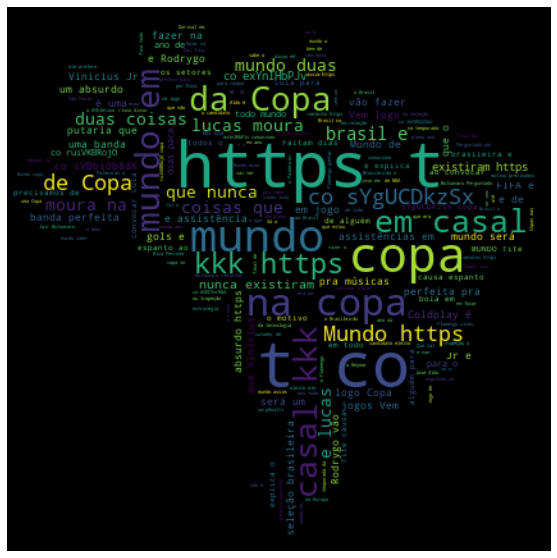

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


aux1 = open("COPA.txt","r") # O TEXTO QUE CRIAMOS COM TODOS OS TWEETS FOI: "COPA.txt"
aux2 = aux1.read()

def show_wordcloud(data, title = None):
  brasil = np.array(Image.open("/content/drive/MyDrive/MESTRADO/2-PERIODO/Analise_nao_de_estruturada_de_dados/ProjetoFinal(OFICIAL)/PROJETO_FINAL/IMAGENS/mapabrasil.jpg"))
  image_colors = ImageColorGenerator(brasil)
  wordcloud = WordCloud(background_color='black', max_words=500, max_font_size= 50, mask = brasil).generate(str(data))
  fig = plt.figure(1, figsize=(10, 10))
  plt.axis('off')
  plt.title(title, size = 25)
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.show

show_wordcloud(aux2)

### 6) Pre-processamento de dados

In [ ]:

def RemoverPontuacao(texto):
    return re.sub(u'[^a-zA-Z0-9áéíóúÁÉÍÓÚâêíîôûÂÊÎÔÛàèìòùÀÈÌÒÙãõÇçoOaA ]', '', texto)

def RemoverStopWord(texto):
    stopWord=nltk.corpus.stopwords.words('portuguese')
    sentencaSemStopword = [i for i in texto.split() if not i in stopWord]
    return " ".join(sentencaSemStopword)

def RemoverNumeros(texto):
    return re.sub('[0-9]', '', texto)




def RemoverURL(texto):
    return re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*','', texto)



def RemoverAssentuacao(texto):
    return normalize('NFKD', texto).encode('ASCII', 'ignore').decode('ASCII')



def Minusculas(texto):
    return texto.lower()


def RemoverColuna(dataframe):
    dataframe=dataframe.drop(dataframe.columns[0], axis=1)
    return dataframe


def Stemming(texto):
    texto=str(texto)
    stemmer = nltk.stem.RSLPStemmer()
    palavras=[]
    for txt in texto.split():
        palavra=stemmer.stem(txt)
        palavras.append(palavra)
    return " ".join(palavras)

    
def RemoverMensionamento(texto):
    if texto.find("@")>=0:
        texto=texto.split("@")
        texto=str(texto[-1])
        contem=texto.find(" ")
        texto=texto[contem+1:]
        
    return texto

def RemoveRepitido(l):
    ulist = []
    [ulist.append(x) for x in l if x not in ulist]
    return ulist


  

### 8) APLICANDO O PRE-PROCESSAMENTO NO TEXTO QUE CRIAMOS (ANTERIORMENTE) COM TODOS OS TWEETS



In [ ]:

aux1 = open("COPA.txt","r") # O TEXTO QUE CRIAMOS COM TODOS OS TWEETS FOI: "COPA.txt"
aux2 = aux1.read()

# APLICAÇÃO DO PRE-PROCESSAMENTO

a = RemoverURL(aux2)
a = RemoverMensionamento(a)
a = RemoverAssentuacao(a)
a = RemoverPontuacao(a)
a = RemoverStopWord(a)
a = Minusculas(a)
a=' '.join(RemoveRepitido(a.split()))

# VISUALZACAO DOS RESULTADOS E GRAVAÇÃO NO ARQUIVO

print(a)

for r in a:
  file = open("COPA_com_Pre-Processamento.txt", "a", -1, "utf-8")
  file.write(r)
  file.close()

foto antiga viralizou ultima copa mundo acho errou nao toca ninguem permitido dai preso exagero claro queria aparecer qdo reporter beijado moca passada murmurio todocarlos eduardo pronuncia pede desculpas entrada guilherme arana acabou lesionando joelho lateral tirando chances convocacao reproducao faltam 71 dias mundoeu cogitaria levar lateraldireito reserva selecao conviccao nivel quase opcoes confiaveis setor levaria jogador outra posicao contaria militao fabinho exercer funcao necessario


### 9) Criando WordCloud

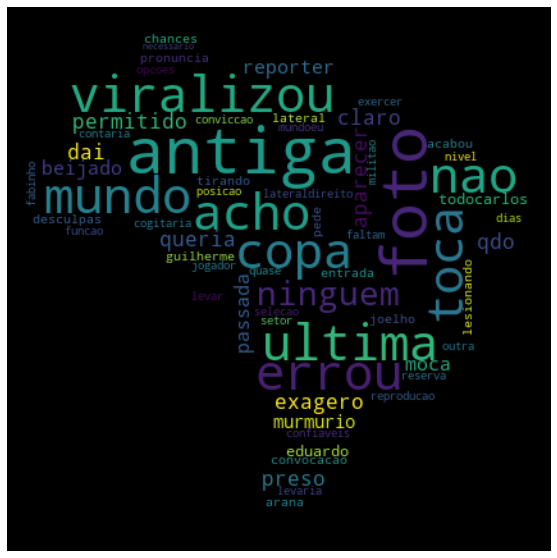

In [ ]:

def show_wordcloud(data, title = None):
  brasil = np.array(Image.open("/content/drive/MyDrive/MESTRADO/2-PERIODO/Analise_nao_de_estruturada_de_dados/ProjetoFinal(OFICIAL)/PROJETO_FINAL/IMAGENS/mapabrasil.jpg"))
  image_colors = ImageColorGenerator(brasil)
  wordcloud = WordCloud(background_color='black', max_words=500, max_font_size= 50, mask = brasil).generate(str(data))
  fig = plt.figure(1, figsize=(10, 10))
  plt.axis('off')
  plt.title(title, size = 25)
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.show

show_wordcloud(a)
